In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data_penjualan_pelanggan.csv')
df_features = df.drop(columns=['ID_Pelanggan'])


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

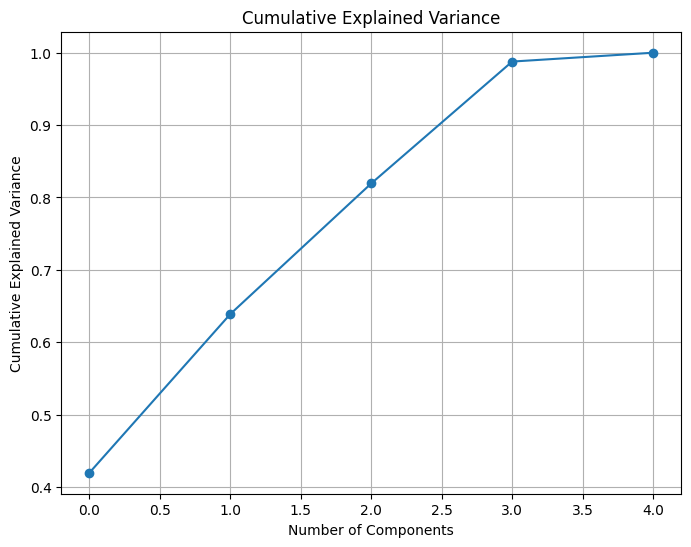

In [6]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [7]:
pca_components = pd.DataFrame(pca.components_,
                              columns=df_features.columns,
                              index=[f'PC{i+1}' for i in range(len(pca.components_))])
print(pca_components)

     Total_Pembelian_Juta  Frekuensi_Kunjungan  Rata2_Belanja_per_Kunjungan  \
PC1              0.516747            -0.503167                     0.676986   
PC2             -0.179874            -0.176040                    -0.040822   
PC3              0.302365             0.129373                     0.059374   
PC4              0.603599             0.694807                    -0.021259   
PC5             -0.494835             0.465122                     0.732152   

     Diskon_Diterima  Jumlah_Produk_Dibeli  
PC1        -0.125388             -0.075919  
PC2        -0.674669              0.692683  
PC3         0.615165              0.714063  
PC4        -0.387784             -0.045631  
PC5         0.017177              0.049588  


In [8]:
# Membuat DataFrame untuk menyimpan hasil PCA
pca = PCA(n_components=2)
x_pca_2d = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=x_pca_2d, columns=['PC1', 'PC2'])
df_pca['ID_Pelanggan'] = df['ID_Pelanggan']

print(df_pca.head())


        PC1       PC2  ID_Pelanggan
0  2.350053 -0.842621             1
1  0.269798 -1.813322             2
2  1.065741 -1.576408             3
3  2.758419 -1.722911             4
4 -0.139761  1.116034             5


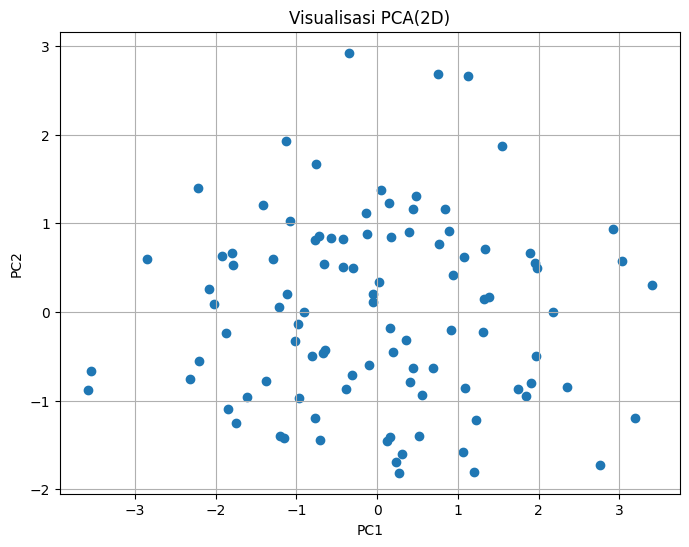

In [9]:
# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Visualisasi PCA(2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()